In [1]:
import numpy as np
import numpy.linalg as nl
import matplotlib.pyplot as plt
import scipy.optimize as so
import jax
import jax.numpy as jnp
# from jax.config import config
jax.config.update("jax_enable_x64", True)

<h1>Forward Problem</h1>

l2 error xvec: 9.41008164741723e-15


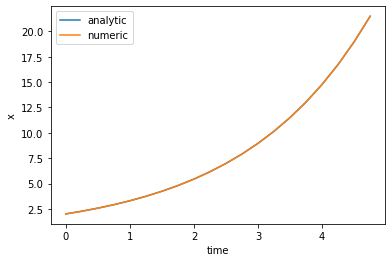

In [2]:
L = 5.0

dt = 0.25

tvec = np.arange(0, 5, dt)

a = 0.5

x0 = 2.0

xvec = [x0]
for i in range(len(tvec) - 1):
    xvec.append(xvec[-1] * np.exp(a * dt))

xvec = np.array(xvec)

print('l2 error xvec:', nl.norm(x0 * np.exp(a * tvec) - xvec))

plt.plot(tvec, x0 * np.exp(a * tvec), label = 'analytic')
plt.plot(tvec, xvec, label = 'numeric')
plt.xlabel('time')
plt.ylabel('x')
plt.legend()
plt.show()

---
<h1>Inverse Problem</h1>

In [3]:
thetahat = np.random.default_rng().uniform(-5, 5)
print(thetahat)

xhatvec = [x0]
for i in range(len(tvec) - 1):
    xhatvec.append(xhatvec[-1] * np.exp(thetahat * dt))

xhatvec = np.array(xhatvec)

gradxhat = 0
for i in range(1, len(tvec)):
    gradxhat += dt * np.exp(i * thetahat * dt) * xhatvec[-i]

print(gradxhat)

-3.3496901438904656
5.057825916067559e-07


In [4]:
print(np.array([11, 12, 13, 14, 15, 16])[0:2])

print(np.arange(1, 2))

[11 12]
[1]


In [70]:
def directmethod(theta):
    # propagate with theta and compute gradient of objective
    thisxhat = x0
    gradJ = 0.0
    thisgradxhat = 0.0
    for i in range(1, len(tvec)):
        # propagate one from the previous state
        thisxhat = thisxhat * jnp.exp(theta * dt)
        thisgradxhat = jnp.exp(theta * dt) * (dt * thisxhat + thisgradxhat)
        gradJ += -(xvec[i] - thisxhat) * thisgradxhat
        # print(xvec[i] - thisxhat, thisgradxhat, gradJ)

    return gradJ

In [71]:
print(directmethod(a))

0.0


In [72]:
def obj(theta):
    # propagate with theta
    xhatvec = [x0]
    for i in range(len(tvec) - 1):
        xhatvec.append(jnp.exp(theta * dt) * xhatvec[-1])

    xhatvec = jnp.array(xhatvec)

    return 0.5 * jnp.sum((xvec - xhatvec)**2)



In [73]:
print(obj(a))

0.0


In [74]:
gradobj = jax.grad(obj)
print(gradobj(a))

-0.0


In [75]:
# check direct grads against JAX grads

for _ in range(50):
    thetahat = np.random.default_rng().uniform(-0.5, 0.5)
    # print(thetahat, directmethod(thetahat), gradobj(thetahat))
    print('grad error:', np.abs(directmethod(thetahat) - gradobj(thetahat)))
    # print('obj:', obj(thetahat))

grad error: 21.602779738221898
grad error: 87.68270599533321
grad error: 20.98476148245254
grad error: 178.24628000965618
grad error: 141.3197648472235
grad error: 13.618091549173869
grad error: 56.89118982261266
grad error: 4.916716283855294
grad error: 6.635079630149903
grad error: 3.0083403337274603
grad error: 39.768646412625685
grad error: 68.90269438316204
grad error: 9.224843660462057
grad error: 24.26877474161512
grad error: 23.566545521565757
grad error: 20.549407332008002
grad error: 22.18437332037763
grad error: 47.32844876738454
grad error: 24.195265694275918
grad error: 6.022362672495092
grad error: 106.45335822905736
grad error: 22.201715033564597
grad error: 5.642167923285228
grad error: 17.92735285218498
grad error: 9.156860079608578
grad error: 186.63262069424673
grad error: 22.910234419111077
grad error: 123.0836067805285
grad error: 119.46594868216448
grad error: 155.13115608026146
grad error: 2.150407684755578
grad error: 23.68309206005256
grad error: 47.48532970714

In [11]:
# grad decent using direct method grad

# grad decent step size
ss = 0.00001

thetahat = np.random.default_rng(123).uniform()
# thetahat = a + np.random.default_rng(123).uniform(-0.05, 0.05)

print('a:', a)
print('thetahat initial:', thetahat)

for i in range(50):
    thetahat -= ss * directmethod(thetahat)

    print('thetahat final:', thetahat)


a: 0.5
thetahat initial: 0.6823518632481435
thetahat final: 0.48126917685700815
thetahat final: 0.4868172307300783
thetahat final: 0.49086115762751714
thetahat final: 0.4937372028553947
thetahat final: 0.4957443663334801
thetahat final: 0.4971257164108153
thetahat final: 0.4980668990670325
thetahat final: 0.4987036833099559
thetahat final: 0.499132433261756
thetahat final: 0.4994201584437498
thetahat final: 0.499612812271338
thetahat final: 0.49974161383224447
thetahat final: 0.49982763869518976
thetahat final: 0.4998850545368696
thetahat final: 0.4999233583613716
thetahat final: 0.49994890423282434
thetahat final: 0.49996593802396316
thetahat final: 0.49997729449010153
thetahat final: 0.4999848651885995
thetahat final: 0.49998991183160685
thetahat final: 0.4999932757992687
thetahat final: 0.4999955180771685
thetahat final: 0.49999701265771707
thetahat final: 0.4999980088520319
thetahat final: 0.49999867284786714
thetahat final: 0.49999911542030223
thetahat final: 0.49999941040659773
t

In [57]:
def adjmethod(theta):
    # propagate with theta
    xhatvec = [x0]
    for i in range(len(tvec) - 1):
        xhatvec.append(xhatvec[-1] * jnp.exp(theta * dt))

    xhatvec = jnp.array(xhatvec)

    # propagate backwards lambda
    # build lambdavec vec backwards then flip at end
    lambdavec = [xvec[-1] - xhatvec[-1]]
    for i in range(2, len(tvec) - 1):
        lambdavec.append(xvec[-i] - xhatvec[-i] + lambdavec[-1] * jnp.exp(theta * dt))

    lambdavec = jnp.flip(jnp.array(lambdavec))
    # lambdavec = jnp.concatenate((jnp.array([0.0]), jnp.flip(jnp.array(lambdavec[1:]))))
    # print('lambda_1:', lambdavec[0])

    # problem: true grad seems to be neg of this, but math says this is correct
    # return dt * jnp.exp(theta * dt) * (lambdavec @ xhatvec[:-2])
    return -1 * dt * jnp.exp(theta * dt) * (lambdavec @ xhatvec[:-2])
    # print(lambdavec @ xhatvec[:-2] - jnp.sum(lambdavec * xhatvec[:-2]))
    # return dt * jnp.exp(theta * dt) * jnp.sum(lambdavec * xhatvec[:-2])

In [58]:
print(adjmethod(a))

-0.0


In [59]:
# check adjoint grads against JAX grads

for _ in range(10):
    thetahat = a + np.random.default_rng().uniform(-0.005, 0.005)
    # thetahat = np.random.default_rng().uniform(-0.5, 0.5)
    print(thetahat, adjmethod(thetahat), gradobj(thetahat))
    print('grad error:', np.abs(adjmethod(thetahat) - gradobj(thetahat)))

0.4965618254250124 -93.0607239231896 -112.18087356724152
grad error: 19.12014964405192
0.5048137824025641 137.03592779803304 165.51658426371083
grad error: 28.480656465677782
0.5048808354175288 139.00181125825785 167.89372982487967
grad error: 28.891918566621825
0.49536215925297583 -124.6162726031509 -150.17683270163442
grad error: 25.56056009848352
0.49736958634560424 -71.54910950157732 -86.2661193509282
grad error: 14.717009849350873
0.5034449324227416 97.25000773342107 117.42346770326206
grad error: 20.17345996984099
0.5033412036498659 94.26190230769467 113.81269609308657
grad error: 19.550793785391903
0.49774945989439634 -61.35844595128631 -73.9860285299736
grad error: 12.627582578687282
0.4975804624374694 -65.89792963800025 -79.45653733874036
grad error: 13.558607700740112
0.495288516573893 -126.53814330820217 -152.4902292233819
grad error: 25.952085915179737
